# P1: Dataset Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [2]:
train_df = pd.read_csv('../Dataset/mitbih_train.csv', header=None)
test_df = pd.read_csv('../Dataset/mitbih_test.csv', header=None)

print("training set shape:", train_df.shape)
print("test set shape:", test_df.shape)
train_df.head()

training set shape: (87554, 188)
test set shape: (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check Data Structure

In [3]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print(f"X_train: {X_train.shape} (samples, timesteps)")
print(f"y_train: {y_train.shape} (labels)")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (87554, 187) (samples, timesteps)
y_train: (87554,) (labels)
X_test: (21892, 187)
y_test: (21892,)


## Class Distribution

In [4]:
class_names = {
    0: 'N - Non-ectopic',
    1: 'S - Supraventricular ectopic',
    2: 'V - Ventricular ectopic',
    3: 'F - Fusion',
    4: 'Q - Unknown'
}

# Count classes in training set
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_dist = dict(zip(unique_train, counts_train))

print("training set class distribution:")
for class_id in sorted(unique_train):
    count = train_dist[class_id]
    pct = (count / len(y_train)) * 100
    print(f"{class_names[class_id]:35s}: {count:6d} ({pct:5.2f}%)")

# Count classes in test set
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_dist = dict(zip(unique_test, counts_test))

print("\ntest set class distribution:")
for class_id in sorted(unique_test):
    count = test_dist[class_id]
    pct = (count / len(y_test)) * 100
    print(f"{class_names[class_id]:35s}: {count:6d} ({pct:5.2f}%)")

training set class distribution:
N - Non-ectopic                    :  72471 (82.77%)
S - Supraventricular ectopic       :   2223 ( 2.54%)
V - Ventricular ectopic            :   5788 ( 6.61%)
F - Fusion                         :    641 ( 0.73%)
Q - Unknown                        :   6431 ( 7.35%)

test set class distribution:
N - Non-ectopic                    :  18118 (82.76%)
S - Supraventricular ectopic       :    556 ( 2.54%)
V - Ventricular ectopic            :   1448 ( 6.61%)
F - Fusion                         :    162 ( 0.74%)
Q - Unknown                        :   1608 ( 7.35%)


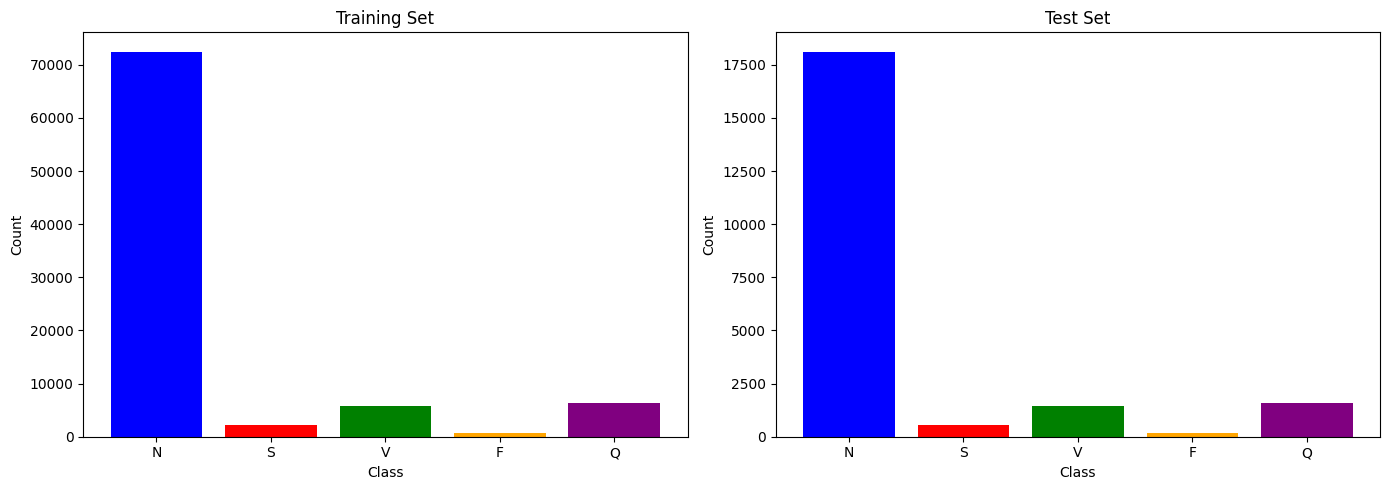


Class imbalance ratio:
N - Non-ectopic                    : 1.00x
S - Supraventricular ectopic       : 32.60x
V - Ventricular ectopic            : 12.52x
F - Fusion                         : 113.06x
Q - Unknown                        : 11.27x


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
train_counts = [train_dist.get(i, 0) for i in range(5)]
axes[0].bar(range(5), train_counts, color=['blue', 'red', 'green', 'orange', 'purple'])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Training Set')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels(['N', 'S', 'V', 'F', 'Q'])

# Test set
test_counts = [test_dist.get(i, 0) for i in range(5)]
axes[1].bar(range(5), test_counts, color=['blue', 'red', 'green', 'orange', 'purple'])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Test Set')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels(['N', 'S', 'V', 'F', 'Q'])

plt.tight_layout()
plt.show()

# Check class imbalance
max_count = max(train_counts)
print("\nClass imbalance ratio:")
for i, count in enumerate(train_counts):
    ratio = max_count / count if count > 0 else 0
    print(f"{class_names[i]:35s}: {ratio:.2f}x")

##  Visualize ECG Signals

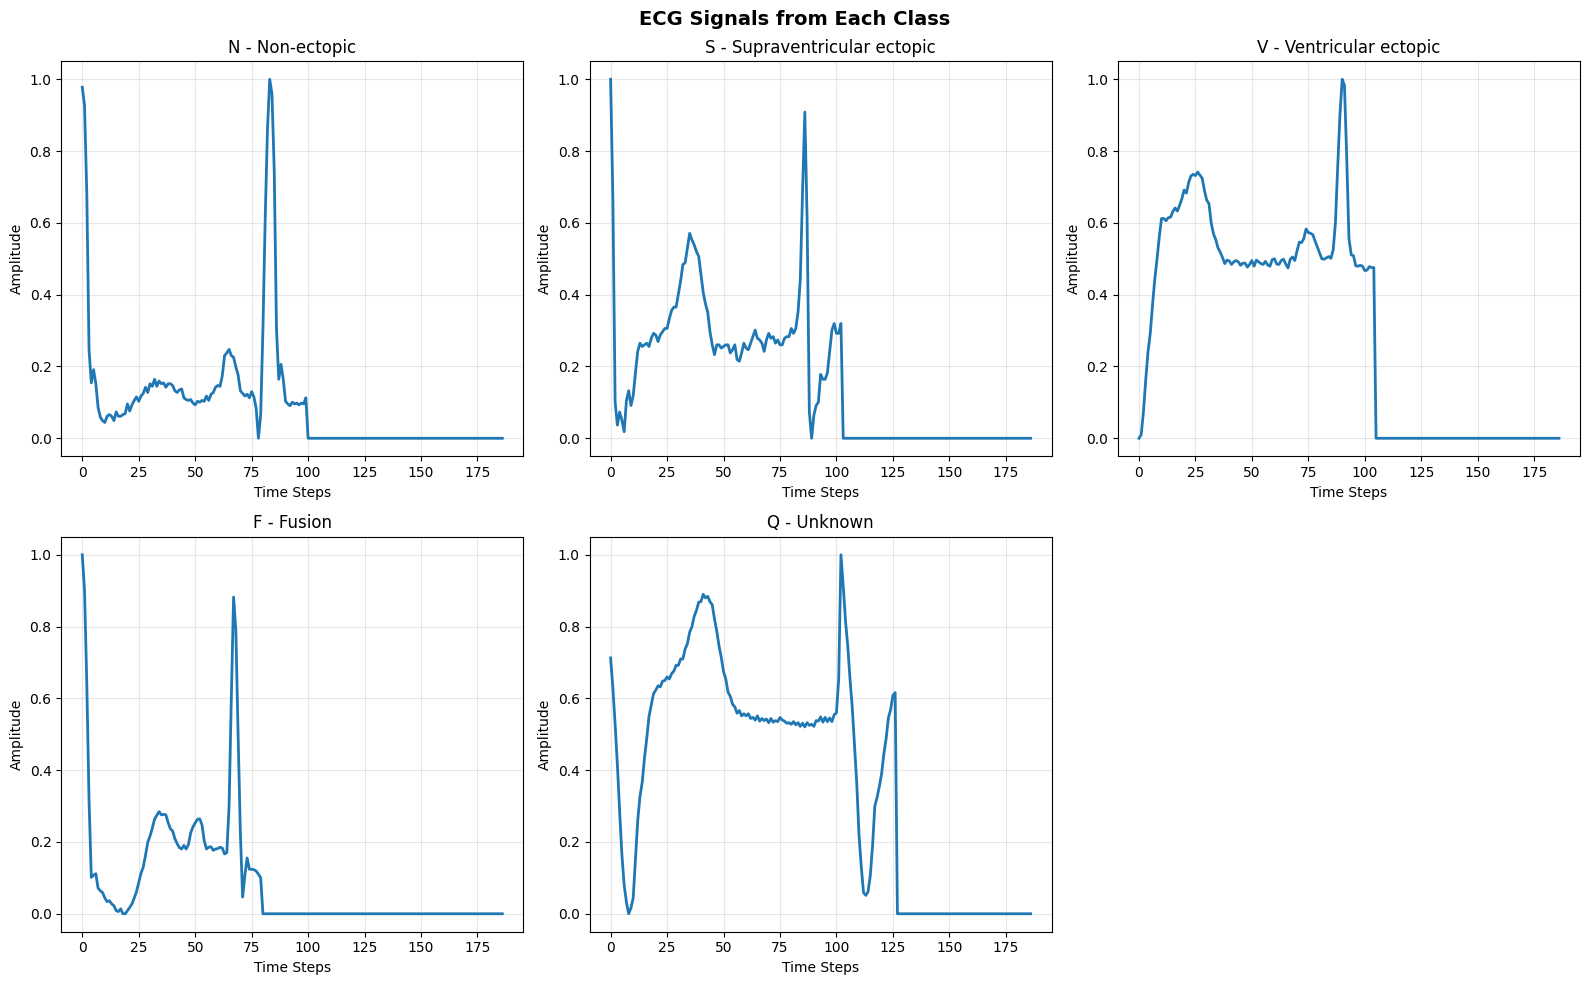

In [6]:
# plot 
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for class_id in range(5):
    class_idx = np.where(y_train == class_id)[0]
    if len(class_idx) > 0:
        signal = X_train[class_idx[0]]
        axes[class_id].plot(signal, linewidth=2)
        axes[class_id].set_title(class_names[class_id])
        axes[class_id].set_xlabel('Time Steps')
        axes[class_id].set_ylabel('Amplitude')
        axes[class_id].grid(True, alpha=0.3)

axes[5].axis('off')
plt.suptitle('ECG Signals from Each Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##  Basic static


In [7]:
# statistics for each class
stats = []

for class_id in range(5):
    class_idx = np.where(y_train == class_id)[0]
    if len(class_idx) > 0:
        signals = X_train[class_idx]
        stats.append({
            'Class': class_names[class_id],
            'Count': len(class_idx),
            'Mean': np.mean(signals),
            'Std': np.std(signals),
            'Min': np.min(signals),
            'Max': np.max(signals)
        })

stats_df = pd.DataFrame(stats)
print(stats_df.to_string(index=False))

                       Class  Count     Mean      Std  Min  Max
             N - Non-ectopic  72471 0.161896 0.217563  0.0  1.0
S - Supraventricular ectopic   2223 0.194778 0.214630  0.0  1.0
     V - Ventricular ectopic   5788 0.243849 0.262343  0.0  1.0
                  F - Fusion    641 0.107253 0.193049  0.0  1.0
                 Q - Unknown   6431 0.250854 0.264309  0.0  1.0


## data Quality Check

In [8]:
# check  missing 
print(f"Missing values - Train: {train_df.isnull().sum().sum()}, Test: {test_df.isnull().sum().sum()}")

# check infinite 
print(f"Infinite values - Train: {np.isinf(X_train).sum()}, Test: {np.isinf(X_test).sum()}")

# check data types
print(f"\nData types:")
print(f"X_train: {X_train.dtype}, y_train: {y_train.dtype}")
print(f"X_test: {X_test.dtype}, y_test: {y_test.dtype}")

# check labels
print(f"\nUnique labels - Train: {np.unique(y_train)}, Test: {np.unique(y_test)}")

Missing values - Train: 0, Test: 0
Infinite values - Train: 0, Test: 0

Data types:
X_train: float64, y_train: float64
X_test: float64, y_test: float64

Unique labels - Train: [0. 1. 2. 3. 4.], Test: [0. 1. 2. 3. 4.]


# P2 – Preprocessing 


## cast data types

In [9]:
import numpy as np

X_train_full = X_train.astype('float32')
y_train_full = y_train.astype('int64')
X_test_float = X_test.astype('float32')
y_test_int = y_test.astype('int64')

print("train full shape:", X_train_full.shape, y_train_full.shape)
print("test shape:      ", X_test_float.shape, y_test_int.shape)
print("dtypes:")
print("  X_train_full:", X_train_full.dtype)
print("  y_train_full:", y_train_full.dtype)
print("  X_test_float:", X_test_float.dtype)
print("  y_test_int:  ", y_test_int.dtype)

train full shape: (87554, 187) (87554,)
test shape:       (21892, 187) (21892,)
dtypes:
  X_train_full: float32
  y_train_full: int64
  X_test_float: float32
  y_test_int:   int64


## original data


In [10]:
from collections import Counter

orig_counts = Counter(y_train_full)
print("Original training labels (before SMOTE):")
for cls in sorted(orig_counts.keys()):
    print(f"  Class {cls}: {orig_counts[cls]}")

Original training labels (before SMOTE):
  Class 0: 72471
  Class 1: 2223
  Class 2: 5788
  Class 3: 641
  Class 4: 6431


## smote to balance training data by  oversample

In [11]:
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    %pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_full, y_train_full)

sm_counts = Counter(y_train_sm)
print("class distribution after smote:")
for cls in sorted(sm_counts.keys()):
    print(f"  class {cls}: {sm_counts[cls]}")

print("\nbalanced train shape:", X_train_sm.shape, y_train_sm.shape)

class distribution after smote:
  class 0: 72471
  class 1: 72471
  class 2: 72471
  class 3: 72471
  class 4: 72471

balanced train shape: (362355, 187) (362355,)


## train / validation split data.

In [12]:
from sklearn.model_selection import train_test_split

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train_sm.astype('float32'),
    y_train_sm.astype('int64'),
    test_size=0.2,
    random_state=42,
    stratify=y_train_sm,
)

print("shapes after split (balanced data):")
print("  X_train_cnn:", X_train_cnn.shape)
print("  y_train_cnn:", y_train_cnn.shape)
print("  X_val_cnn:  ", X_val_cnn.shape)
print("  y_val_cnn:  ", y_val_cnn.shape)

shapes after split (balanced data):
  X_train_cnn: (289884, 187)
  y_train_cnn: (289884,)
  X_val_cnn:   (72471, 187)
  y_val_cnn:   (72471,)


In [18]:
# Quick check: label distribution in new train/val
import numpy as np

def print_label_distribution(name, y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    print(name)
    for c, cnt in zip(unique, counts):
        pct = cnt / total * 100
        print(f"  Class {c}: {cnt:6d} ({pct:5.2f}%)")
    print()

print_label_distribution("test labels (after smote)", y_train_cnn)
print_label_distribution("val labels (after smote )", y_val_cnn)

test labels (after smote)
  Class 0:  57977 (20.00%)
  Class 1:  57977 (20.00%)
  Class 2:  57977 (20.00%)
  Class 3:  57976 (20.00%)
  Class 4:  57977 (20.00%)

val labels (after smote )
  Class 0:  14494 (20.00%)
  Class 1:  14494 (20.00%)
  Class 2:  14494 (20.00%)
  Class 3:  14495 (20.00%)
  Class 4:  14494 (20.00%)



## Reshape for 1D CNN

In [13]:
X_train_cnn = X_train_cnn[..., np.newaxis]
X_val_cnn   = X_val_cnn[..., np.newaxis]
X_test_cnn  = X_test_float[..., np.newaxis]

print("final shapes for CNN:")
print("  X_train_cnn:", X_train_cnn.shape)
print("  X_val_cnn:  ", X_val_cnn.shape)
print("  X_test_cnn: ", X_test_cnn.shape)

final shapes for CNN:
  X_train_cnn: (289884, 187, 1)
  X_val_cnn:   (72471, 187, 1)
  X_test_cnn:  (21892, 187, 1)


# Add channel dimension

In [14]:
X_train_cnn = X_train_cnn[..., np.newaxis]
X_val_cnn   = X_val_cnn[..., np.newaxis]
X_test_cnn  = X_test_float[..., np.newaxis]

print("Final shapes for CNN:")
print("  X_train_cnn:", X_train_cnn.shape)
print("  X_val_cnn:  ", X_val_cnn.shape)
print("  X_test_cnn: ", X_test_cnn.shape)

Final shapes for CNN:
  X_train_cnn: (289884, 187, 1, 1)
  X_val_cnn:   (72471, 187, 1, 1)
  X_test_cnn:  (21892, 187, 1)


# P3 Model 

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
tf.random.set_seed(42)


## build a simple CNN

In [16]:
num_classes = 5
input_shape = (X_train_cnn.shape[1], X_train_cnn.shape[2])  # (187, 1)

model = keras.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv1D(32, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, padding='same', activation='relu'),
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 187, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 93, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 93, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,357 (204.52 KB)

 Trainable params: 52,357 (204.52 KB)

 Non-trainable params: 0 (0.00 B)

## compile , train

In [17]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
]

history = model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=40,
    batch_size=128,
    verbose=1,
)

print("Training done.")

Epoch 1/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8653 - loss: 0.3644 - val_accuracy: 0.9330 - val_loss: 0.1797
Epoch 2/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9309 - loss: 0.1869 - val_accuracy: 0.9500 - val_loss: 0.1341
Epoch 3/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9475 - loss: 0.1450 - val_accuracy: 0.9609 - val_loss: 0.1072
Epoch 4/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9552 - loss: 0.1247 - val_accuracy: 0.9660 - val_loss: 0.0932
Epoch 5/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9613 - loss: 0.1084 - val_accuracy: 0.9725 - val_loss: 0.0785
Epoch 6/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9657 - loss: 0.0960 - val_accuracy: 0.9752 - val_loss: 0.0712
Epoch 7/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9691 - loss: 0.0872 - val_accuracy: 0.9799 - val_loss: 0.0588
Epoch 8/40
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9716 -

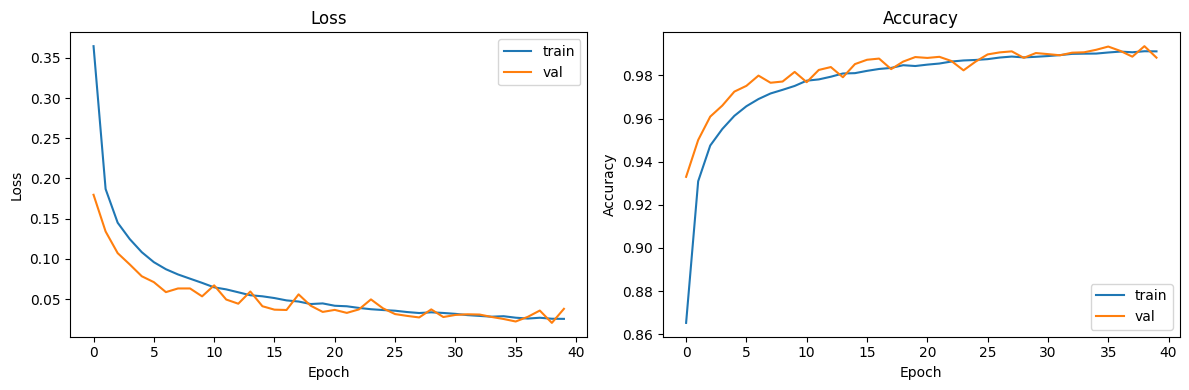

In [18]:
# Plot training curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## evaluate on testset

In [20]:
y_prob = model.predict(X_test_cnn, batch_size=256, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

test_acc = accuracy_score(y_test_int, y_pred)
print(f"test accuracy: {test_acc:.4f}")

print("\nClassification report:")
print(classification_report(
    y_test_int,
    y_pred,
    target_names=[class_names[i] for i in range(5)]
))

test accuracy: 0.9464

Classification report:
                              precision    recall  f1-score   support

             N - Non-ectopic       0.99      0.95      0.97     18118
S - Supraventricular ectopic       0.35      0.83      0.50       556
     V - Ventricular ectopic       0.93      0.96      0.94      1448
                  F - Fusion       0.61      0.89      0.72       162
                 Q - Unknown       0.99      0.99      0.99      1608

                    accuracy                           0.95     21892
                   macro avg       0.78      0.92      0.82     21892
                weighted avg       0.97      0.95      0.95     21892



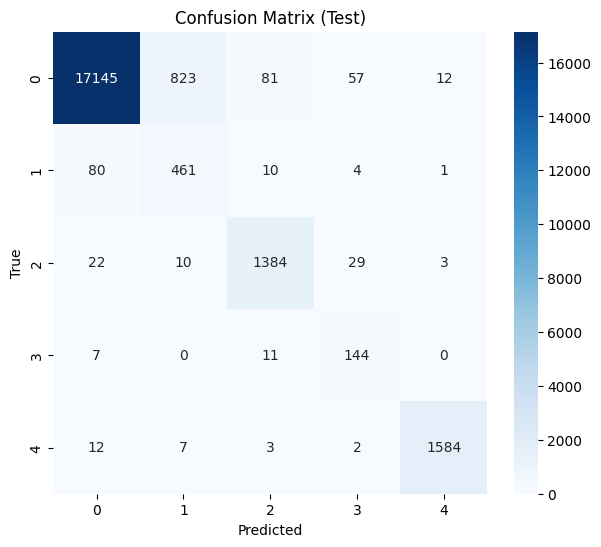

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test_int, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1','2','3','4'],
            yticklabels=['0','1','2','3','4'])
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# P4, compare

In [25]:
# Compare 
paper_accuracy = 93.4  

print(f"(kachuee et al., 2018): {paper_accuracy}% accuracy")
print(f"model:                    {test_acc*100:.2f}% accuracy")
print(f"difference:                    {abs(test_acc*100 - paper_accuracy):.2f}%")

(kachuee et al., 2018): 93.4% accuracy
model:                    94.64% accuracy
difference:                    1.24%


#  P5: Save Model 

In [26]:
model.save('../model.h5')
print("Model saved to: ../model.h5")

Model saved to: ../model.h5
